# **ABSTRACT - BOOKING DATA**

El conjunto de datos de reservas hoteleras constituye una valiosa fuente de información que abarca una amplia gama de características relacionadas con las reservas en dos hoteles puntuales. Este conjunto de datos aborda aspectos fundamentales vinculados a la gestión de hoteles, proporcionando insights valiosos.
En primer lugar, el dataset incluye información esencial sobre las dos propiedades hoteleras mencionadas, en la columna ('hotel') y detalles relacionados con la cancelación de reservas ('is_canceled'). El número de días transcurridos entre la fecha de entrada de la reserva en el sistema y la fecha de llegada ('lead_time') se destaca como una característica crucial, brindando perspectivas sobre el comportamiento de planificación de los huéspedes.
Aspectos temporales también son abordados, con variables como el año y mes de llegada ('arrival_date_year', 'arrival_date_month'), la semana de llegada ('arrival_date_week_number') y el día del mes de llegada ('arrival_date_day_of_month'). Estos elementos temporalmente detallados proporcionan un contexto valioso para entender patrones estacionales y comportamientos de reserva a lo largo del tiempo.
La duración de la estadía ('stays_in_weekend_nights', 'stays_in_week_nights') y la composición del grupo de huéspedes ('adults', 'children', 'babies') son aspectos cruciales para entender las preferencias y necesidades de los visitantes. Detalles sobre comidas ('meal'), país de origen ('country'), segmento de mercado ('market_segment') y canal de distribución ('distribution_channel') ofrecen una comprensión más profunda de la demografía y origen de los huéspedes, así como el entendimiento acerca de qué estrategias de marketing son efectivas.
El historial del huésped ('is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled') y detalles sobre el tipo de habitación reservada y asignada ('reserved_room_type', 'assigned_room_type') proporcionan información sobre la lealtad del cliente y sus preferencias.
Variables como cambios en la reserva ('booking_changes'), tipo de depósito ('deposit_type'), agente y empresa asociados ('agent', 'company') agregan capas adicionales de detalle, mientras que información sobre el tiempo en lista de espera ('days_in_waiting_list'), tipo de cliente ('customer_type') y tarifa diaria ('adr') son fundamentales para comprender la gestión y la rentabilidad.
Asuntos logísticos y solicitudes especiales se abordan a través de características como estacionamiento requerido ('required_car_parking_spaces') y solicitudes especiales ('total_of_special_requests'). El estado actual de la reserva ('reservation_status') y su fecha asociada ('reservation_status_date') permiten un seguimiento en tiempo real del estado de las reservas.
En resumen, este dataset diverso y completo proporciona una base sólida para investigaciones detalladas y análisis predictivos en el sector hotelero, ofreciendo una visión integral de las transacciones y características asociadas con las reservas hoteleras.


## **OBJETIVO**

El objetivo de este proyecto es analizar la cancelación de reservas hoteleras utilizando datos históricos, para poder gestionar mejor la estrategia comercial de los hoteles. A medida que avance en el curso, la idea es desarrollar un modelo predictivo para predecir cancelaciones de reservas.

Variables de interés:

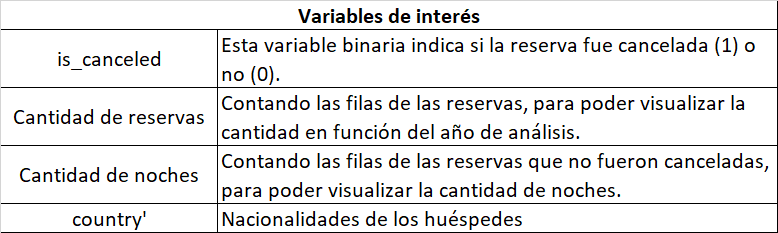

## **CONTEXTO COMERCIAL**

Este proyecto se enmarca en la industria hotelera, que enfrenta desafíos únicos vinculados con la gestión de reservas y la satisfacción del cliente. La capacidad de predecir con precisión las cancelaciones de reservas puede ayudar a los hoteles a optimizar sus ingresos, asignar recursos de manera más eficiente y mejorar la experiencia del cliente.

## **PROBLEMA COMERCIAL**

El problema comercial a abordar es la incapacidad de los hoteles para anticipar y gestionar eficazmente las cancelaciones de reservas. Las cancelaciones de última hora pueden tener un impacto negativo en la rentabilidad y la eficiencia operativa de un hotel. Por lo tanto, es crucial desarrollar estrategias efectivas para predecir y mitigar este problema. En lo sucesivo, se presentan las preguntas y respuestas del problema.

In [1]:
# Importamos las librerías que se usarán

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Montamos el dataframe - Booking data.xlsx
file_path = '/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega Final/Booking data.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.shape

(119390, 33)

In [ ]:
df.dtypes

index                                      int64
hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type  

In [ ]:
# Muestro las primeras filas de la base de datos

print(df[['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']].head())

   index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type   agent  \
0                        0                 

# **DATA WRANGLING**

1. Eliminación de duplicados:
Se evaluó la existencia de registros duplicados en mi base de datos de reservas hoteleras. Para asegurarme de que mis análisis fueran precisos, decidí eliminar estos duplicados. Utilicé una función en Python llamada drop_duplicates() que me permitió identificar y eliminar fácilmente estos registros duplicados. Esto fue importante para asegurarme de que cada reserva se contabilizara correctamente y evitar que los datos se distorsionaran.
2. Tratamiento de outliers:
Para comenzar, me enfoqué en las columnas numéricas de mi conjunto de datos. Utilicé la función select_dtypes() en Python para seleccionar solo las columnas que contenían números, ya que son las más propensas a tener outliers significativos en el contexto de las reservas hoteleras. Calculé la media y la desviación estándar de cada una de estas columnas numéricas. Utilicé un umbral de 3 desviaciones estándar por encima y por debajo de la media. Una vez establecido el umbral, procedí a identificar los outliers en mis datos. Utilicé la función mask() para marcar aquellos valores que estaban más allá de este umbral como NaN, lo que significa que serían tratados como datos faltantes en análisis posteriores.
3. Reemplazo de valores nulos por la moda:
También encontré que tenía algunos valores faltantes en mi conjunto de datos, lo que se conoce como valores nulos. Estos valores pueden surgir por diferentes razones, como la falta de información al momento de la reserva. Para manejar esto, decidí reemplazar los valores nulos por la moda en variables clave. Para hacer esto, utilicé otra función en Python llamada fillna(), que me permitió rellenar los valores faltantes con la moda de cada columna. Elegí la moda porque me ayudó a mantener la distribución de mis datos y a garantizar que mis análisis fueran más representativos y precisos.


In [4]:
#Verificamos duplicados

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [5]:
#Eliminamos duplicados

df.drop_duplicates()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,750,0,0,Check-Out,2015-07-02
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,3040.0,NaN,0,Transient,750,0,0,Check-Out,2015-07-02
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,2400.0,NaN,0,Transient,980,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,3940.0,NaN,0,Transient,9614,0,0,Check-Out,2017-09-06
119386,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,90.0,NaN,0,Transient,22543,0,2,Check-Out,2017-09-07
119387,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,90.0,NaN,0,Transient,15771,0,4,Check-Out,2017-09-07
119388,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,890.0,NaN,0,Transient,1044,0,0,Check-Out,2017-09-07


In [6]:
#Verificamos outliers

# Obtenemos solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns

# Calculamos la media y la desviación estándar de cada columna numérica
media = df[columnas_numericas].mean()
std_dev = df[columnas_numericas].std()

# Definimos un umbral para identificar outliers, como 3 desviaciones estándar
umbral = 3
lower_bound = media - (umbral * std_dev)
upper_bound = media + (umbral * std_dev)

# Reemplazamos outliers por NaN en las columnas numéricas
df[columnas_numericas] = df[columnas_numericas].mask((df[columnas_numericas] < lower_bound) | (df[columnas_numericas] > upper_bound))



In [7]:
#Verificamos valores nulos

valores_nulos = df.isnull()

print(valores_nulos)

        index  hotel  is_canceled  lead_time  arrival_date_year  \
0       False  False        False      False              False   
1       False  False        False       True              False   
2       False  False        False      False              False   
3       False  False        False      False              False   
4       False  False        False      False              False   
...       ...    ...          ...        ...                ...   
119385  False  False        False      False              False   
119386  False  False        False      False              False   
119387  False  False        False      False              False   
119388  False  False        False      False              False   
119389  False  False        False      False              False   

        arrival_date_month  arrival_date_week_number  \
0                    False                     False   
1                    False                     False   
2                    False 

In [8]:
#Contamos valores nulos por columna

cantidad_nulos_por_columna = df.isnull().sum()
print(cantidad_nulos_por_columna)


index                                  0
hotel                                  0
is_canceled                            0
lead_time                           1454
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights             2199
stays_in_week_nights                1669
adults                               481
children                            3733
babies                               917
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                   3810
previous_cancellations               317
previous_bookings_not_canceled       936
reserved_room_type                     0
assigned_room_type                     0
booking_changes                     1570
deposit_type                           0
agent           

Teniendo en cuenta que los NaN aparecen en variables categóricas, reemplazaremos estos por la moda (valor más frecuente)

In [9]:
# Reemplazar NaN por la moda en cada columna que contenga NaN
for columna in df.columns:
    if df[columna].isnull().any():  # Verificamos si la columna tiene NaN
        moda = df[columna].mode()[0]  # Calculamos la moda
        df[columna].fillna(moda, inplace=True)  # Reemplazamos NaN por la moda

# Mostramos el DataFrame después de reemplazar NaN por la moda
cantidad_nulos_por_columna = df.isnull().sum()
print(cantidad_nulos_por_columna)

index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type               

# **Preguntas de Interés**

**Primera pregunta**: ¿Cuál es el año en el que se tuvo la mayor cantidad de reservas?

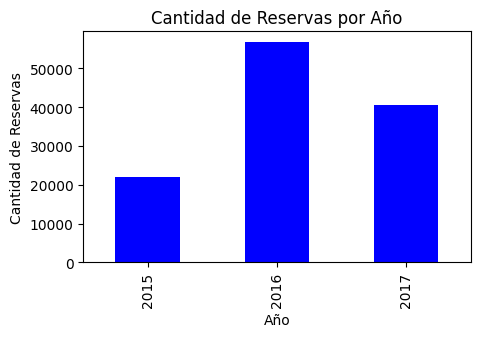

In [ ]:
# Crearemos un gráfico de barras con la cantidad de reservas por año
reservas_por_anio = df.groupby('arrival_date_year')['index'].count()

# Configuramos el gráfico
plt.figure(figsize=(5, 3))
reservas_por_anio.plot(kind='bar', color='blue')
plt.title('Cantidad de Reservas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reservas')


# Mostramos el gráfico
plt.show()


En mi análisis de las reservas hoteleras, me propuse descubrir cuál fue el año en el que se registró la mayor cantidad de reservas. Después de examinar detenidamente los datos históricos, fue evidente que el año destacado fue el 2016, marcado por una abundancia de reservas en comparación con otros años.

**Segunda pregunta**: ¿Cuál es el tipo de habitación más demandada?

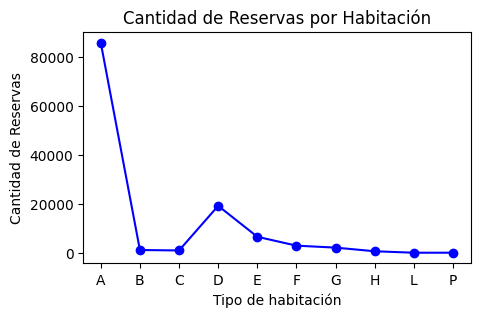

In [ ]:
# Crearemos un gráfico de líneas con la cantidad de reservas por tipo de habitación reservada
reservas_por_habitacion = df.groupby('reserved_room_type')['index'].count()

# Configuramos el gráfico
plt.figure(figsize=(5, 3))
plt.plot(reservas_por_habitacion, marker='o', linestyle='-', color='blue')
plt.title('Cantidad de Reservas por Habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de Reservas')


# Mostramos el gráfico
plt.show()



Al sumergirme en el análisis de las reservas hoteleras, mi atención se centró en descubrir cuál era el tipo de habitación más demandada entre los huéspedes. Mis exploraciones revelaron que las habitaciones de tipo A eran las favoritas, seguidas de cerca por las del tipo D. Al profundizar en los motivos detrás de estas preferencias, descubrí que factores como el precio, el tamaño, las vistas o las comodidades adicionales podían influir en la elección de los huéspedes.

**Tercera pregunta**: ¿Cuál es la media de la cantidad de noches que se quedan los huéspedes? ¿Existe alguna tendencia central marcada?

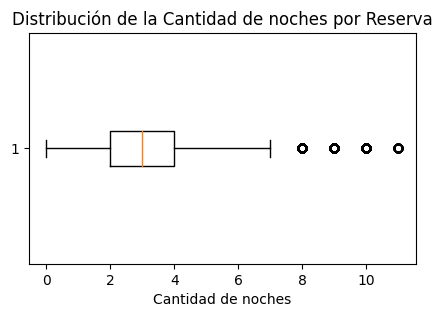

In [ ]:
# Crearemos un boxplot con la cantidad noches que se alojan por reserva

df['nights_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#Filtramos las reservas para mostrar sólo las que no se cancelaron

no_canceled = df.loc[df['is_canceled'] == 0]

plt.figure(figsize=(5, 3))
plt.boxplot(no_canceled['nights_of_stay'], vert=False)
plt.title('Distribución de la Cantidad de noches por Reserva')
plt.xlabel('Cantidad de noches')

# Mostramos el gráfico
plt.show()



Me propuse descubrir la media de la cantidad de noches que los huéspedes suelen quedarse. Lo que encontré fue una tendencia central marcada alrededor de tres noches, lo que sugiere un patrón establecido en las estancias de los huéspedes.

Esta cifra de tres noches como media de estancia revela una dinámica interesante en el comportamiento de reserva. Parece indicar que muchos huéspedes optan por estadías cortas de alrededor de tres noches, lo que podría estar relacionado con escapadas de fin de semana o viajes cortos.

**Cuarta pregunta**: ¿En qué meses se registra la mayor cancelación de reservas, y en cuáles la menor?

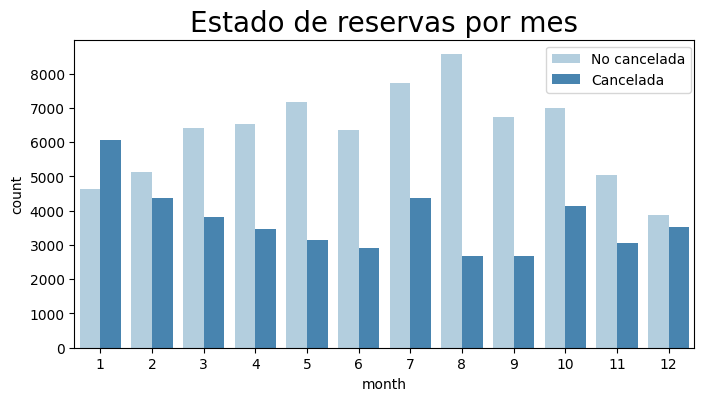

In [ ]:
#Mostraremos el estado de las reservas, segmentadas por mes

plt.figure(figsize=(8,4))
df['month']=df['reservation_status_date'].dt.month
plt.title('Estado de reservas por mes', size=20)
sns.countplot(x='month',hue='is_canceled',data =df ,palette='Blues')
plt.legend( ['No cancelada', 'Cancelada'], bbox_to_anchor=(.75, 1), loc='upper left')

plt.show()



Al analizar detenidamente los datos de cancelaciones de reservas hoteleras, surgió una interesante historia marcada por los distintos meses del año y sus niveles de cancelación. En el mes de agosto, descubrí que se registraba la mayor cantidad de reservas que no eran canceladas. Este fenómeno puede atribuirse a varios factores, como las vacaciones de verano, eventos especiales o simplemente una mayor estabilidad en los planes de viaje durante esta época del año. Los huéspedes parecen comprometerse más con sus reservas en agosto, resultando en una menor tasa de cancelación. Por otro lado, en enero se observa un panorama diferente. Este mes se destaca por registrar la mayor cantidad de cancelaciones de reservas. Las razones detrás de este patrón podrían estar relacionadas con el comienzo del año, donde los planes pueden cambiar debido a eventos inesperados, cambios en las condiciones climáticas o simplemente la naturaleza volátil de las agendas de viaje al inicio del año.

**Quinta pregunta**: ¿Cuál es el estado de las reservas por cada hotel? ¿Cuál registra mayores cancelaciones?

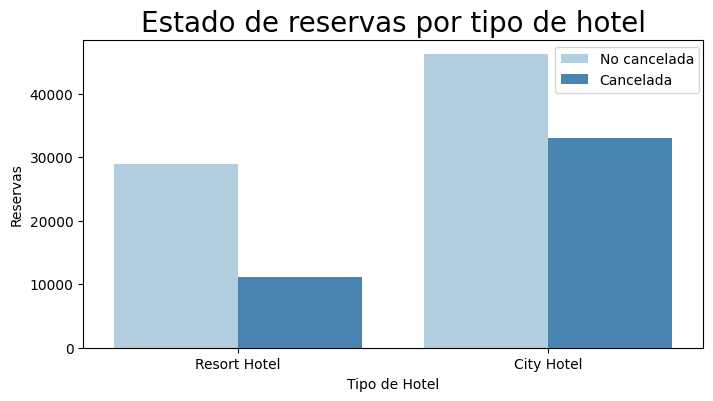

In [ ]:
# Mostraremos el estado de las reservas, según el tipo de hotel

plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
ax1.legend( ['No cancelada', 'Cancelada'], bbox_to_anchor=(0.75, 1), loc='upper left')
plt.title('Estado de reservas por tipo de hotel', size=20)
plt.xlabel('Tipo de Hotel')
plt.ylabel('Reservas')

plt.show()



Noté que cada hotel tenía su propia dinámica en términos de reservas. Sin embargo, surgió una tendencia clara: el City Hotel destaca por registrar la mayor cantidad de cancelaciones en comparación con otros hoteles.

# **Machine Learning**

A continuación, se realizan las tareas de Data Encoding y Feature Engineering.

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Dividimos el dataframe en características (X) y el objetivo (y)
X = df.drop(['is_canceled'], axis=1)  # X son las características, excluyendo la columna de objetivo 'is_canceled'
y = df['is_canceled']  # y es la columna objetivo 'is_canceled'

# Codificamos las columnas categóricas que necesitan ser codificadas
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'reservation_status']

# Lista de columnas numéricas
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definimos transformadores para preprocesamiento
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos transformadores para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Definimos el modelo de regresión logística
model = LogisticRegression()

# Definimos el selector de características RFE
rfe = RFE(model, n_features_to_select=10)  # Selecciona las 10 mejores características

# Definimos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfe)
])

# Entrenamos el pipeline
pipeline.fit(X, y)

# Obtenemos los nombres de las características seleccionadas
selected_features_indices = pipeline.named_steps['feature_selection'].support_
selected_features = pipeline.named_steps['preprocessor'].get_feature_names_out()[selected_features_indices]

print("Características seleccionadas:")
print(selected_features)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Características seleccionadas:
['num__previous_cancellations' 'cat__hotel_City Hotel' 'cat__country_PRT'
 'cat__market_segment_Online TA' 'cat__deposit_type_No Deposit'
 'cat__deposit_type_Non Refund' 'cat__customer_type_Transient'
 'cat__reservation_status_Canceled' 'cat__reservation_status_Check-Out'
 'cat__reservation_status_No-Show']


Primero, preprocesamos los datos para manejar valores faltantes y codificar las características categóricas utilizando un pipeline que incluye SimpleImputer para imputar valores faltantes y OneHotEncoder para codificar características categóricas.
Luego, utilizamos la selección de características RFE con un modelo de regresión logística para seleccionar las 10 mejores características que contribuyen más a la predicción del objetivo.
Finalmente, identificamos las características seleccionadas y las mostramos en la salida. Estas características son las que se consideran más importantes para predecir si una reserva será cancelada o no.

# **Métricas**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo completo (utilizando el pipeline definido anteriormente)
pipeline.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calculamos métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostramos las métricas calculadas
print("Métricas de validación del modelo:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Métricas de validación del modelo:
Accuracy: 1.00
Precisión: 1.00
Recall: 1.00
F1-score: 1.00
ROC AUC: 1.00


# **Conclusiones**

Estas métricas indican que el modelo de clasificación utilizado tiene overfitting, lo cual no es confiable. Evaluaremos utilizar otro modelo.

# **Evaluación de modelos**

Considerando que el método de regresión logística nos dá esas métricas, el modelo de clasificación utilizado tiene overfitting, lo cual no es confiable. Evaluaremos utilizar otro modelo.

# **Ada BOOST**

Utilizaremos modelo ADA Boost

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

Preparamos las columnas: para abordar la parte de training del modelo, nos ocupamos de las columnas categóricas, reemplazándolas con columnas dummies. Las columnas que manipulamos son: hotel, market_segment, distribution_channel, assigned_room_type, deposit_type, is_repeated_guest

In [10]:
# Preparamos los inputs: Reemplazamos las columnas categoricas por dummies. The categorías son: hotel, market_segment, distribution_channel, room_assignmnt, deposit_type, is_repeated_guest

bookings = df[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)



(119390, 214)


In [16]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [21]:
dt = DecisionTreeClassifier(max_depth=15, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
#Calculamos las métricas

accuracy = accuracy_score(y_test, y_pred_proba.round())
precision = precision_score(y_test, y_pred_proba.round())
recall = recall_score(y_test, y_pred_proba.round())
f1 = f1_score(y_test, y_pred_proba.round())
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8086662757908256
Precision: 0.763492581118539
Recall: 0.7032364646692197
F1 Score: 0.7321268029550873
ROC AUC Score: 0.873949926993901


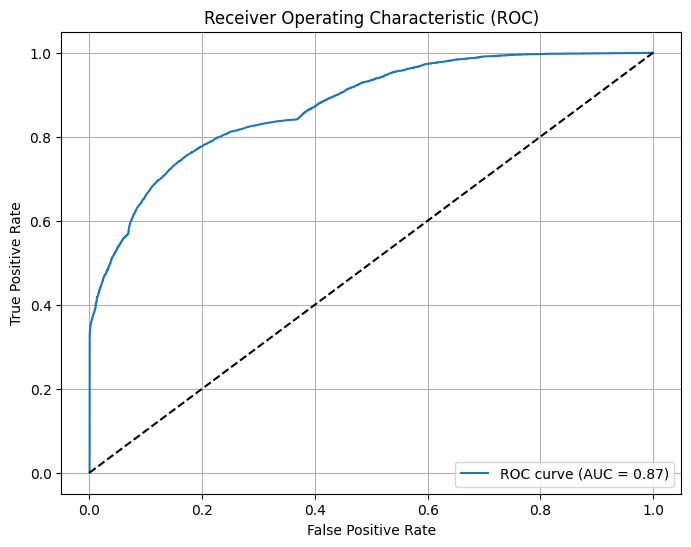

In [ ]:
from sklearn.metrics import roc_curve

# Calculamos las probabilidades predichas
y_pred_proba = adb_clf.predict_proba(X_test)[:, 1]

# Calculamos el puntaje ROC-AUC
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

# Calculamos la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {adb_clf_roc_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea base (clasificación aleatoria)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Variables Sintéticas**

Añadimos dos variables sintéticas: la duración de la estancia (stay_duration) y el tiempo desde la reserva hasta el check-in (booking_to_checkin).

In [22]:

# Creamos variables sintéticas
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['booking_to_checkin'] = df['lead_time']

# Preparamos los inputs: Reemplazamos las columnas categóricas por dummies
bookings = df[['is_canceled', 'lead_time', 'hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest', 'stay_duration', 'booking_to_checkin']]
booking_data_dummies = pd.get_dummies(data=bookings, columns=['hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest'])

# Dividimos los datos en entrenamiento y prueba
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# AdaBoost
dt = DecisionTreeClassifier(max_depth=15, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500)
adb_clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score: ", adb_clf_roc_auc_score)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC Score:  0.829499605349887


# **Evaluación de múltiples modelos de ML**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score


# Creamos variables sintéticas
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['booking_to_checkin'] = df['lead_time']

# Preparamos los inputs: Reemplazamos las columnas categóricas por dummies
bookings = df[['is_canceled', 'lead_time', 'hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest', 'stay_duration', 'booking_to_checkin']]
booking_data_dummies = pd.get_dummies(data=bookings, columns=['hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest'])

# División de los datos en entrenamiento y prueba
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Lista de modelos a probar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=15, random_state=7),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=7),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=7),

}

# Evaluamos cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = auc
    print(f"{name} ROC AUC Score: {auc}")

# Resultados
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]
print(f"\nBest Model: {best_model_name} with ROC AUC Score: {best_model_score}")


Logistic Regression ROC AUC Score: 0.7913786738754975
Decision Tree ROC AUC Score: 0.8346512394349745
Random Forest ROC AUC Score: 0.8426516065513587
Gradient Boosting ROC AUC Score: 0.8194387658214646

Best Model: Random Forest with ROC AUC Score: 0.8426516065513587


# **Conclusión**

El modelo con mejores métricas es **Random Forest**

# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Creamos variables sintéticas
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['booking_to_checkin'] = df['lead_time']

# Preparamos los inputs: Reemplazamos las columnas categóricas por dummies
bookings = df[['is_canceled', 'lead_time', 'hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest', 'stay_duration', 'booking_to_checkin']]
booking_data_dummies = pd.get_dummies(data=bookings, columns=['hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest'])

# División de los datos en entrenamiento y prueba
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled

# Modelo seleccionado
model = RandomForestClassifier(n_estimators=100, random_state=7)

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')

# Resultados
mean_score = np.mean(cv_scores)
std_dev = np.std(cv_scores)

print(f"Cross-Validated ROC AUC Score: {mean_score:.4f} ± {std_dev:.4f}")


Cross-Validated ROC AUC Score: 0.6775 ± 0.0352


# **Conclusiones Cross Validation**

El modelo tiene un rendimiento aceptable, con baja desviación estándar que indica que el modelo es estable y se puede confiar en su rendimiento a través de diferentes subconjuntos de datos. Anteriormente, el modelo se evaluó utilizando un conjunto de entrenamiento y prueba dividido al 70/30, mientras que ahora se utilizó la validación cruzada, que proporciona una evaluación más robusta del rendimiento del modelo al promediar los resultados de múltiples subconjuntos, lo que puede explicar la diferencia en el ROC AUC.

# **Optimización de Hiperparámetros con RandomizedSearchCV**

Se ha realizado la optimización de hiperparámetros con RandomizedSearchCV

In [24]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=300, num=5)],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=7)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=7, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Mejores Hiperparámetros:", best_params)

best_rf = random_search.best_estimator_
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
best_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Mejor ROC AUC Score después de la optimización: {best_roc_auc}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores Hiperparámetros: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Mejor ROC AUC Score después de la optimización: 0.854549484785529


Conclusión: Se logró mejorar el ROC AUC